# **Crítica de películas**

*Librerías*

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

*Tratamiento de los datos*

In [ ]:
df_peliculas=pd.DataFrame({'Puntuación':np.array([0,1,2,3,4,5]),'Cantidad de votantes':np.array([40,96,133,145,99,40])})


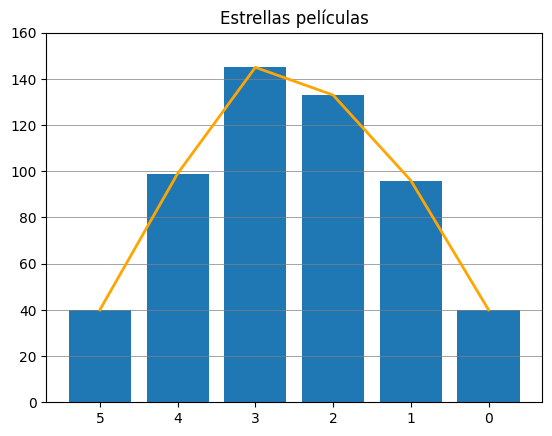

In [ ]:
#gráfica puntuaciones

fig, ax = plt.subplots()
ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)
ax.bar(df_peliculas['Puntuación'], df_peliculas['Cantidad de votantes'])
ax.plot(df_peliculas['Puntuación'], df_peliculas['Cantidad de votantes'], color='orange', linewidth=2)


ax.set_ylim([0, 160])
ax.invert_xaxis()
ax.set_title('Estrellas películas')
plt.show()


Media ,varianza, cuartiles.....

In [ ]:
df_peliculas=df_peliculas.rename(columns={'Puntuación':'Puntuación Xi','Cantidad de votantes':' Votantes Ni'})

*Calculo de frecuencia relativa (fi) y la frecuencia relativa acumulada(Fi)*

In [ ]:
#función  para crear la columna  fi de nuestra tabla que es la columnna de las frecuencias relativas

def fi():
  votantes=[40,96,133,145,99,40]
  total_votantes=sum(votantes)
  fi=[]
  for votante in votantes :
    votante_fi=votante/(total_votantes)
    fi.append(votante_fi)
    
  return fi

frec_relativa=fi()
#la lista de la frecuencia relativa
print(frec_relativa)
#comprobamos que los valores suman 1
suma=sum(frec_relativa)
print("Como podremos comprobar las suma es " + str(suma))



[0.07233273056057866, 0.1735985533453888, 0.24050632911392406, 0.26220614828209765, 0.17902350813743217, 0.07233273056057866]
Como podremos comprobar las suma es 1.0


In [ ]:
# Define una lista de valores de frecuencias relativas
frec_relativa = frec_relativa

# Calcula la frecuencia acumulada para cada valor en la lista de frecuencias relativas
frec_acumulada = []
acumulado = 0
for frecuencia in frec_relativa:
    acumulado += frecuencia
    frec_acumulada.append(acumulado)

# Imprime la lista de frecuencias acumuladas
print(frec_acumulada)


[0.07233273056057866, 0.24593128390596747, 0.4864376130198915, 0.7486437613019892, 0.9276672694394213, 1.0]


In [ ]:
frec_relativa_redondeada = [round(valor, 4) for valor in frec_relativa]
frec_relativa_acumulada_redondeada=[round(valor, 4) for valor in frec_acumulada]
df_peliculas['fi']=frec_relativa_redondeada
df_peliculas["Fi"]=frec_relativa_acumulada_redondeada
df_peliculas

,Puntuación Xi,Votantes Ni,fi,Fi
0,0,40,0.0723,0.0723
1,1,96,0.1736,0.2459
2,2,133,0.2405,0.4864
3,3,145,0.2622,0.7486
4,4,99,0.1790,0.9277
5,5,40,0.0723,1.0000


*Calculo de las columnas (NixXi) y Ni(Xi-media)^2*

In [ ]:
df_peliculas.columns

Index(['Puntuación Xi', ' Votantes Ni', 'fi', 'Fi'], dtype='object')

In [ ]:
#en primer lugar calculamos Ni*Xi
df_peliculas['Ni*Xi']=df_peliculas['Puntuación Xi']*df_peliculas[' Votantes Ni']
df_peliculas

,Puntuación Xi,Votantes Ni,fi,Fi,Ni*Xi
0,0,40,0.0723,0.0723,0
1,1,96,0.1736,0.2459,96
2,2,133,0.2405,0.4864,266
3,3,145,0.2622,0.7486,435
4,4,99,0.1790,0.9277,396
5,5,40,0.0723,1.0000,200


*Media*

In [ ]:
#ahora sumamos los datos de la columna Ni*Xi
suma1=df_peliculas['Ni*Xi'].sum()
suma2=df_peliculas[' Votantes Ni'].sum()
media=(suma1/suma2).round(2)
print("La media de las estrellas de las pelis es "+str(media))

La media de las estrellas de las pelis es 2.52


*Varianza y desviación típica*

In [ ]:
#Calculamos la columna Ni*(Xi-media)^2
df_peliculas['Ni*(Xi-media)^2']=df_peliculas[' Votantes Ni']*((df_peliculas['Puntuación Xi']-media)**2)
df_peliculas

,Puntuación Xi,Votantes Ni,fi,Fi,Ni*Xi,Ni*(Xi-media)^2
0,0,40,0.0723,0.0723,0,254.0160
1,1,96,0.1736,0.2459,96,221.7984
2,2,133,0.2405,0.4864,266,35.9632
3,3,145,0.2622,0.7486,435,33.4080
4,4,99,0.1790,0.9277,396,216.8496
5,5,40,0.0723,1.0000,200,246.0160


In [ ]:
varianza=(sum(df_peliculas['Ni*(Xi-media)^2'])/suma2).round(2)
d_tip=(np.sqrt(varianza)).round(2)

print("La varianza es " +str(varianza))
print("La desviación típica es " +str(d_tip))


La varianza es 1.82
La desviación típica es 1.35


*Calculo de los 8 %, 95 % y 97 % de repartos.*

In [ ]:
total_votantes = df_peliculas[' Votantes Ni'].sum()

percentil_8 = None
percentil_95 = None
percentil_97 = None
#calculamos el rango del percentil 8%, 95% y 97% utilizando el número total de votantes.
rango_percentil_8 = 0.08 * total_votantes
rango_percentil_95 = 0.95 * total_votantes
rango_percentil_97 = 0.97 * total_votantes
# con iterrows(). Para cada fila, comparamos su frecuencia relativa acumulada con el valor del percentil 
for i, row in df_peliculas.iterrows():
    if row['Fi'] >= 0.08 and percentil_8 is None:
        if row['Fi'] == 0.08:
            percentil_8 = row['Puntuación Xi']
        else:
            dato_anterior = df_peliculas.loc[i-1, 'Puntuación Xi']
            dif_valores = row['Puntuación Xi'] - dato_anterior
            fraccion_percentil = (rango_percentil_8 - df_peliculas.loc[i-1, 'Fi'] * total_votantes) / (row[' Votantes Ni'])
            percentil_8 = (dato_anterior + (dif_valores * fraccion_percentil)).round(3)
    if row['Fi'] >= 0.95 and percentil_95 is None:
        if row['Fi'] == 0.95:
            percentil_95 = row['Puntuación Xi']
        else:
            dato_anterior = df_peliculas.loc[i-1, 'Puntuación Xi']
            dif_valores = row['Puntuación Xi'] - dato_anterior
            fraccion_percentil = (rango_percentil_95 - df_peliculas.loc[i-1, 'Fi'] * total_votantes) / (row[' Votantes Ni'])
            percentil_95 =(dato_anterior + (dif_valores * fraccion_percentil)).round(2)
    if row['Fi'] >= 0.97 and percentil_97 is None:
        if row['Fi'] == 0.97:
            percentil_97 = row['Puntuación Xi']
        else:
            dato_anterior = df_peliculas.loc[i-1, 'Puntuación Xi']
            dif_valores = row['Puntuación Xi'] - dato_anterior
            fraccion_percentil = (rango_percentil_97 - df_peliculas.loc[i-1, 'Fi'] * total_votantes) / (row[' Votantes Ni'])
            percentil_97 = (dato_anterior + (dif_valores * fraccion_percentil)).round(2)


  

In [ ]:
#estos son los datos que dejan por debajo de sí respectivamente el 8% el 95% y 97 
print("El percentil 8% es:", percentil_8)
print("El percentil 95% es:", percentil_95)
print("El percentil 97% es:", percentil_97)

El percentil 8% es: 0.044
El percentil 95% es: 4.31
El percentil 97% es: 4.58


El  8% de los datos estará entre las puntaciones [0 ,1]

El 95% entre el [0,4.31]

El 97% entre[0, 4.58]



